In [85]:
using AutomotiveDrivingModels
using AutoViz
include("lane_change_env.jl")
include("action_space.jl")

get_actions (generic function with 1 method)

In [99]:
ncars = 10
nlanes = 4
road_length = 200.

scene, roadway = create_env(ncars, nlanes, road_length)

(Scene(with 10 cars), Roadway)

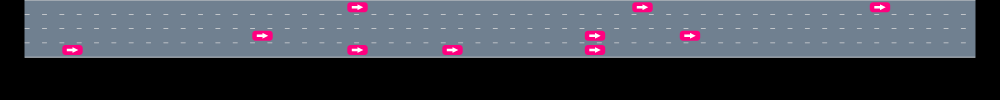

In [100]:
cam = StaticCamera(VecE2(100.0,0.0), 4.75)
render(scene, roadway, cam=cam, canvas_height=100)

In [101]:
# create ego vehicle
# change color of ego vehicle
# define ego vehicle behavior model
# run safe action space algorithm and make sure that the output is what we think it will be
# - make sure that the safe acceleration/lane-change combinations are correct
curve = roadway[1].lanes[1].curve
posG = VecSE2(0., 0., 0.)
lane = Lane(LaneTag(1, 1), curve)
posF = Frenet(posG, lane, roadway)
curr_vel = 30.
car_initial_state = VehicleState(posF, roadway, curr_vel)
ego = Vehicle(car_initial_state, VehicleDef(), ncars+1)
push!(scene, ego)

Scene(with 11 cars)

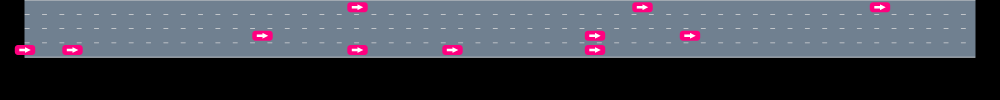

In [102]:
cam = StaticCamera(VecE2(100.0,0.0), 4.75)
render(scene, roadway, cam=cam, canvas_height=100)

In [103]:
models = Dict{Int, DriverModel}()
for i in 1:ncars
    models[i] = IntelligentDriverModel(v_des=scene[i].state.v)
end
models[ncars + 1] = lat_lon_driver(curr_vel, 0.1)

lat_lon_driver(IntelligentDriverModel
  a: Float64 NaN
  σ: Float64 NaN
  k_spd: Float64 1.0
  δ: Float64 4.0
  T: Float64 1.5
  v_des: Float64 30.0
  s_min: Float64 5.0
  a_max: Float64 3.0
  d_cmf: Float64 2.0
  d_max: Float64 9.0
, ProportionalLaneTracker
  a: Float64 NaN
  σ: Float64 NaN
  kp: Float64 3.0
  kd: Float64 2.0
, MOBIL
  dir: Int64 0
  rec: QueueRecord{Entity{VehicleState,VehicleDef,Int64}}
  mlon: IntelligentDriverModel
  safe_decel: Float64 2.0
  politeness: Float64 0.35
  advantage_threshold: Float64 0.1
)

In [104]:
actions = get_actions(models[ncars+1], scene, roadway, ncars+1)
@show actions

actions = Dict{Any,Any}("normal_straight" => true,"slow_right" => false,"speed_left" => true,"speed_right" => false,"speed_straight" => true,"slow_straight" => true,"slow_left" => true,"normal_right" => false,"normal_left" => true)


Dict{Any,Any} with 9 entries:
  "normal_straight" => true
  "slow_right"      => false
  "speed_left"      => true
  "speed_right"     => false
  "speed_straight"  => true
  "slow_straight"   => true
  "slow_left"       => true
  "normal_right"    => false
  "normal_left"     => true

In [106]:
# a few useful things to extract info - might be in one of the get() functions
@show roadway.segments[1].lanes[end].tag.lane
@show scene[ncars+1].state.posF.roadind.tag.lane

((roadway.segments[1]).lanes[end]).tag.lane = 4
(scene[ncars + 1]).state.posF.roadind.tag.lane = 1


1